In [1]:
require(tidyverse)
require(data.table)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [2]:
phe_f   <- '/oak/stanford/groups/mrivas/projects/snpnet/sample_data/sample_phe.phe'
train_f <- '/oak/stanford/groups/mrivas/projects/snpnet/sample_data/train.psam'
val_f   <- '/oak/stanford/groups/mrivas/projects/snpnet/sample_data/val.psam'
all_f   <- '/oak/stanford/groups/mrivas/projects/snpnet/sample_data/all.psam'

In [6]:
phe_df <- fread(phe_f)
train_df <- fread(train_f) %>% rename('FID' = '#FID')
val_df   <- fread(val_f)   %>% rename('FID' = '#FID')
all_df   <- fread(all_f)   %>% rename('FID' = '#FID')


In [11]:
phe_df %>% 
select(-split) %>%
left_join(
    bind_rows(
        train_df %>% select(FID, IID) %>% mutate(split = 'train'),
        val_df   %>% select(FID, IID) %>% mutate(split = 'val')        
    ), 
    by=c('FID', 'IID')
) %>%
fwrite('/oak/stanford/groups/mrivas/projects/snpnet/sample_data/sample.phe')

In [8]:
train_df %>% head()

FID,IID,SEX,PHENO1
<chr>,<chr>,<int>,<dbl>
per0,per0,2,-0.832928
per1,per1,2,-1.013160
per2,per2,2,1.051990
per3,per3,2,-1.460000
per5,per5,2,-0.152931
per6,per6,2,0.225121


In [6]:
phe_df %>% count(split)

split,n
<chr>,<int>
train,1600
val,400


In [7]:
length(which(phe_df$split == 'train'))

[1] 1600

In [9]:
read_IDs_from_psam <- function(psam){
    df <- data.table::fread(psam) %>%
    dplyr::rename('FID' = '#FID') %>%
    dplyr::mutate(ID = paste(FID, IID, sep='_'))
    df$ID
}

In [19]:
all<-read_IDs_from_psam(all_f)

In [20]:
train_g<-read_IDs_from_psam(train_f)

In [28]:
train <- all[phe_df$ID %in% all]

In [29]:
all(train == train_g)

[1] TRUE

In [30]:
length(train)

[1] 0

In [31]:
length(train_g)

[1] 1600

In [32]:
train

character(0)

In [33]:
train

character(0)

In [36]:
length(phe_df$ID[phe_df$split == 'train'])

[1] 0

In [38]:
phe_df$IID[which(phe_df$split == 'train')] %>% head()

[1] "per0" "per1" "per2" "per4" "per5" "per6"

In [42]:
(!c(T, F, T)) & c(F, T, T)

[1] FALSE  TRUE FALSE

In [46]:
min(phe_df$QPHE)

[1] -5.240824

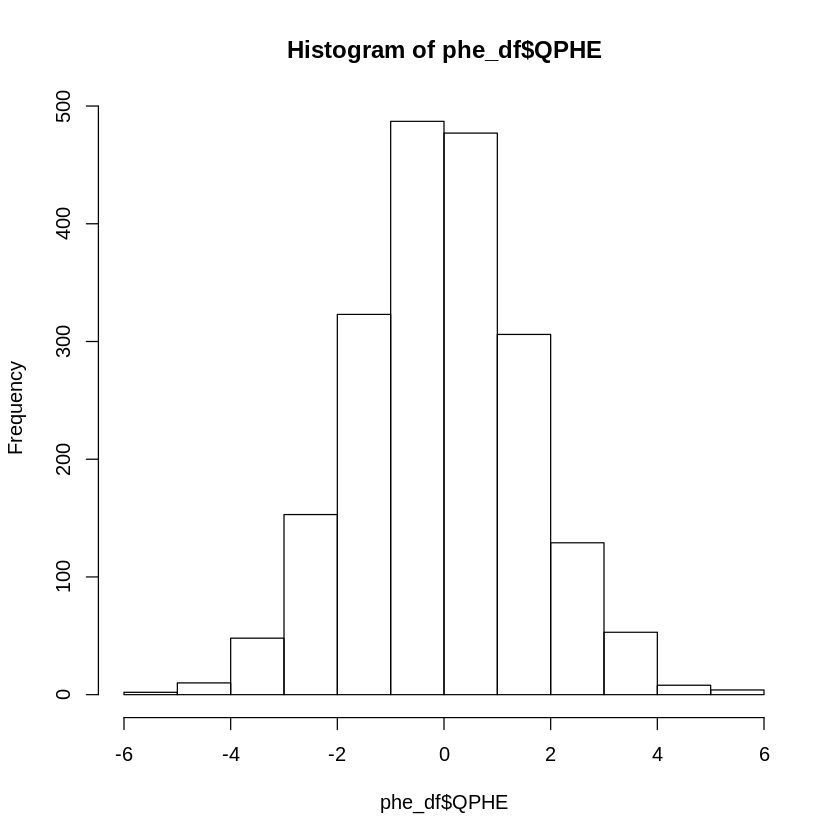

In [45]:
hist(phe_df$QPHE)